Data Science Solutions with Python by Tshepo Chris Nokeri, Apress. 2021

# CHAPTER 5: BINARY CLASSIFICATIO WITH SCIKIT-LEARN, PYSPARK AND H2O

This chapter executes and appraises a non-linear method for binary classification (logistic
regression) using a diverse set of comprehensive Python frameworks (i.e.,
SciKit-Learn, Spark MLlib, and H2O). At the outset, it sufficiently clarifies the
underlying concept behind the sigmoid function.

# Import Dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set("talk","ticks",font_scale=1, font="Calibri")
df = pd.read_csv(r"C:\Users\i5 lenov\Downloads\banking.csv")

## Dropping Unnecessary Features in the Data

In [2]:
drop_column_names = df.columns[[8, 9, 10]]
initial_data = df.drop(drop_column_names, axis="columns")

## Attain Dummy Features

In [3]:
initial_data.iloc[::, 1] = pd.get_dummies(initial_data.iloc[::, 1])
initial_data.iloc[::, 2] = pd.get_dummies(initial_data.iloc[::, 2])
initial_data.iloc[::, 3] = pd.get_dummies(initial_data.iloc[::, 3])
initial_data.iloc[::, 4] = pd.get_dummies(initial_data.iloc[::, 4])
initial_data.iloc[::, 5] = pd.get_dummies(initial_data.iloc[::, 5])
initial_data.iloc[::, 6] = pd.get_dummies(initial_data.iloc[::, 6])
initial_data.iloc[::, 7] = pd.get_dummies(initial_data.iloc[::, 7])
initial_data.iloc[::, 11] = pd.get_dummies(initial_data.iloc[::, 11])

## Drop Null Values

In [4]:
initial_data = initial_data.dropna()

## Outline Features

In [5]:
import numpy as np
x = np.array(initial_data.iloc[::, 0:17])
y = np.array(initial_data.iloc[::,-1])

## Randomly Divide the Data Frame

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Scale Features

In [7]:
from sklearn.preprocessing import StandardScaler
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

# SciKit-Learn in Action

In [8]:
from sklearn.linear_model import LogisticRegression
sk_logistic_regression_method = LogisticRegression()
sk_logistic_regression_method.fit(sk_standard_scaled_x_train, y_train)

LogisticRegression()

In [9]:
from sklearn.model_selection import GridSearchCV
sk_logistic_regression_method_param = {"penalty":("l1","l2")}
sk_logistic_regression_method_param_mod  = GridSearchCV(estimator=sk_logistic_regression_method, param_grid=sk_logistic_regression_method_param, n_jobs=-1)
sk_logistic_regression_method_param_mod.fit(sk_standard_scaled_x_train, y_train)
print("Best logistic regression score: ", sk_logistic_regression_method_param_mod.best_score_)
print("Best logistic regression parameter: ", sk_logistic_regression_method_param_mod.best_params_)

Best logistic regression score:  0.8986039453717755
Best logistic regression parameter:  {'penalty': 'l2'}


In [10]:
sk_logistic_regression_method = LogisticRegression(penalty="l2")
sk_logistic_regression_method.fit(sk_standard_scaled_x_train, y_train)

LogisticRegression()

In [11]:
sk_yhat = sk_logistic_regression_method.predict(sk_standard_scaled_x_test)
sk_yhat = pd.DataFrame(sk_yhat, columns = ["Computed Values"])
sk_yhat.head(10)

,Computed Values
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [12]:
print(sk_logistic_regression_method.intercept_)

[-2.4596243]


In [13]:
print(sk_logistic_regression_method.coef_)

[[ 0.03374725  0.04330667 -0.01305369 -0.02709009  0.13508899  0.01735913
   0.00816758  0.42948983 -0.12670658 -0.25784955 -0.04025993 -0.14622466
  -1.14143485  0.70803518  0.23256046 -0.02295578 -0.02857435]]


In [14]:
from sklearn import metrics
sk_logistic_regression_method_assessment_1 = pd.DataFrame(metrics.confusion_matrix(y_test, sk_yhat), index=["Actual: Deposit","Actual: No deposit"], columns=("Predicted: deposit","Predicted: No deposit"))
sk_logistic_regression_method_assessment_1

,Predicted: deposit,Predicted: No deposit
Actual: Deposit,7230,95
Actual: No deposit,711,202


In [15]:
sk_logistic_regression_method_assessment_2 = pd.DataFrame(metrics.classification_report(y_test, sk_yhat, output_dict=True)).transpose()
sk_logistic_regression_method_assessment_2

,precision,recall,f1-score,support
0,0.910465,0.987031,0.947203,7325.000000
1,0.680135,0.221249,0.333884,913.000000
accuracy,0.902161,0.902161,0.902161,0.902161
macro avg,0.795300,0.604140,0.640544,8238.000000
weighted avg,0.884938,0.902161,0.879230,8238.000000


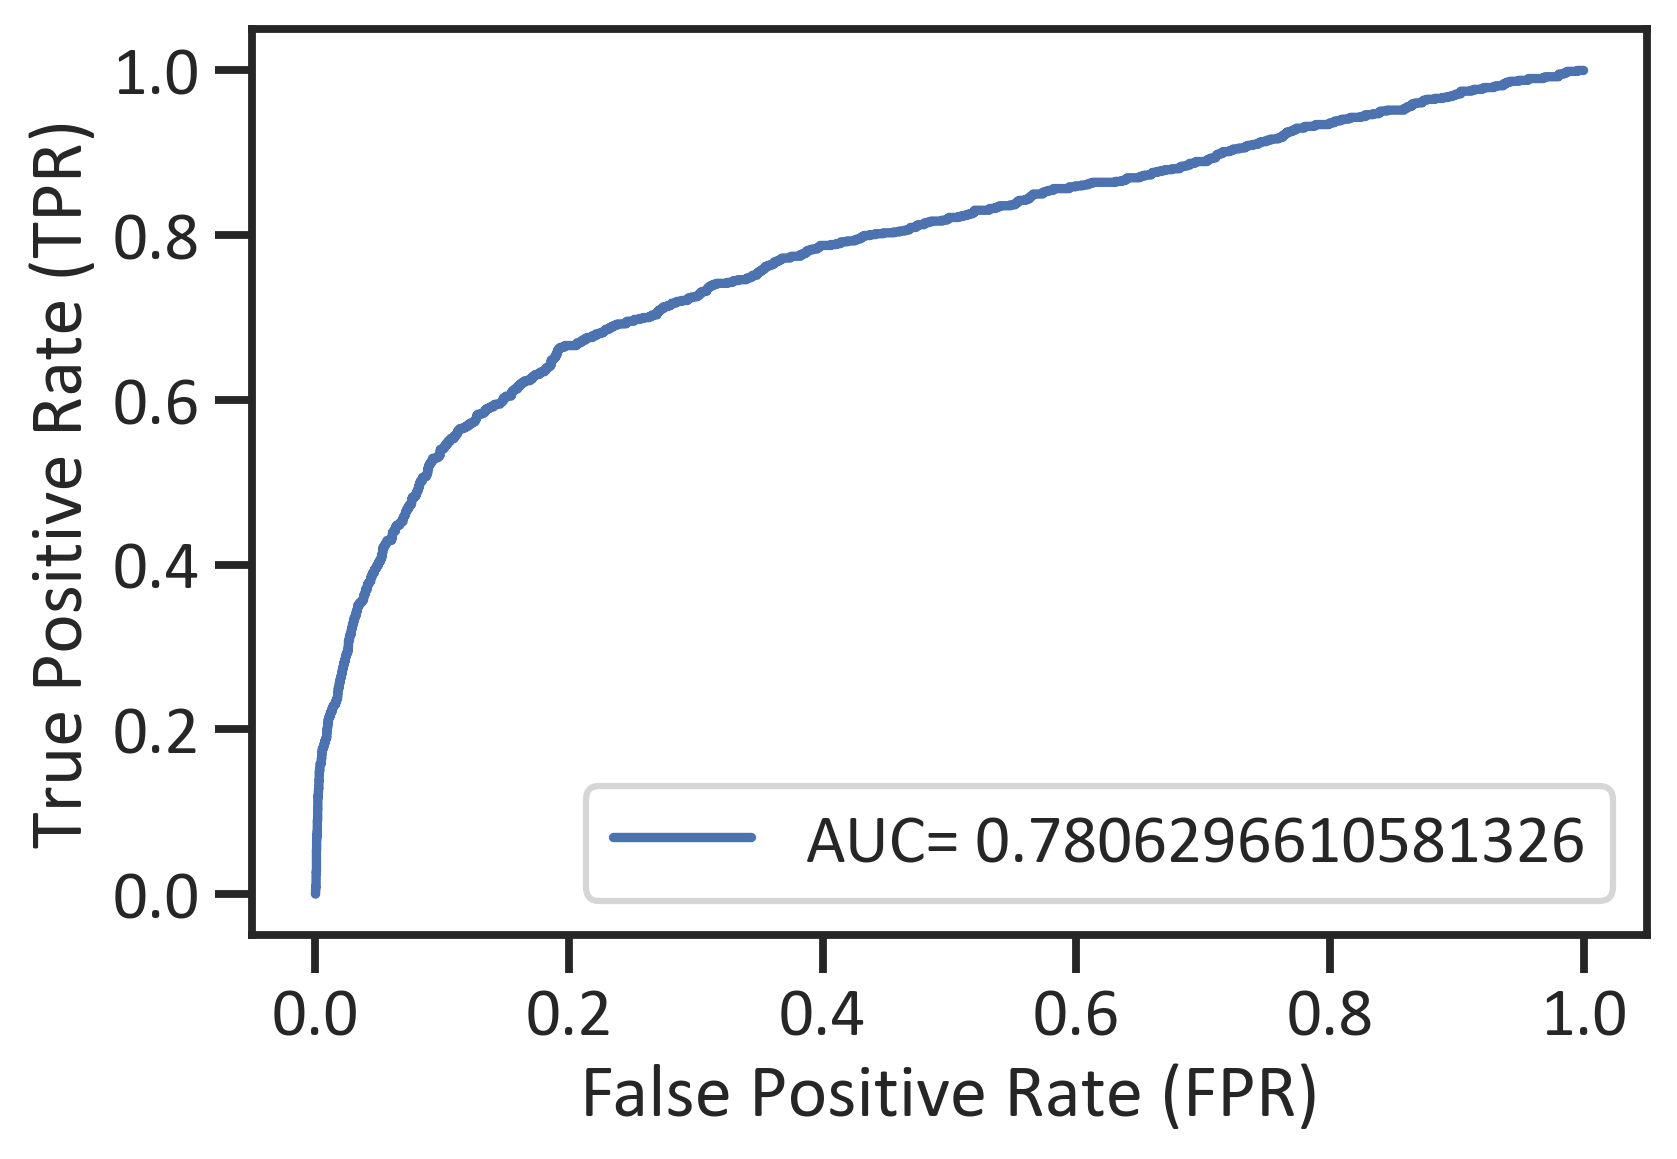

In [16]:
sk_yhat_proba = sk_logistic_regression_method.predict_proba(sk_standard_scaled_x_test)[::,1]
fpr_sk_logistic_regression_method, tprr_sk_logistic_regression_method, _ = metrics.roc_curve(y_test, sk_yhat_proba)
area_under_curve_sk_logistic_regression_method = metrics.roc_auc_score(y_test, sk_yhat_proba)
plt.plot(fpr_sk_logistic_regression_method, tprr_sk_logistic_regression_method, label="AUC= "+ str(area_under_curve_sk_logistic_regression_method))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

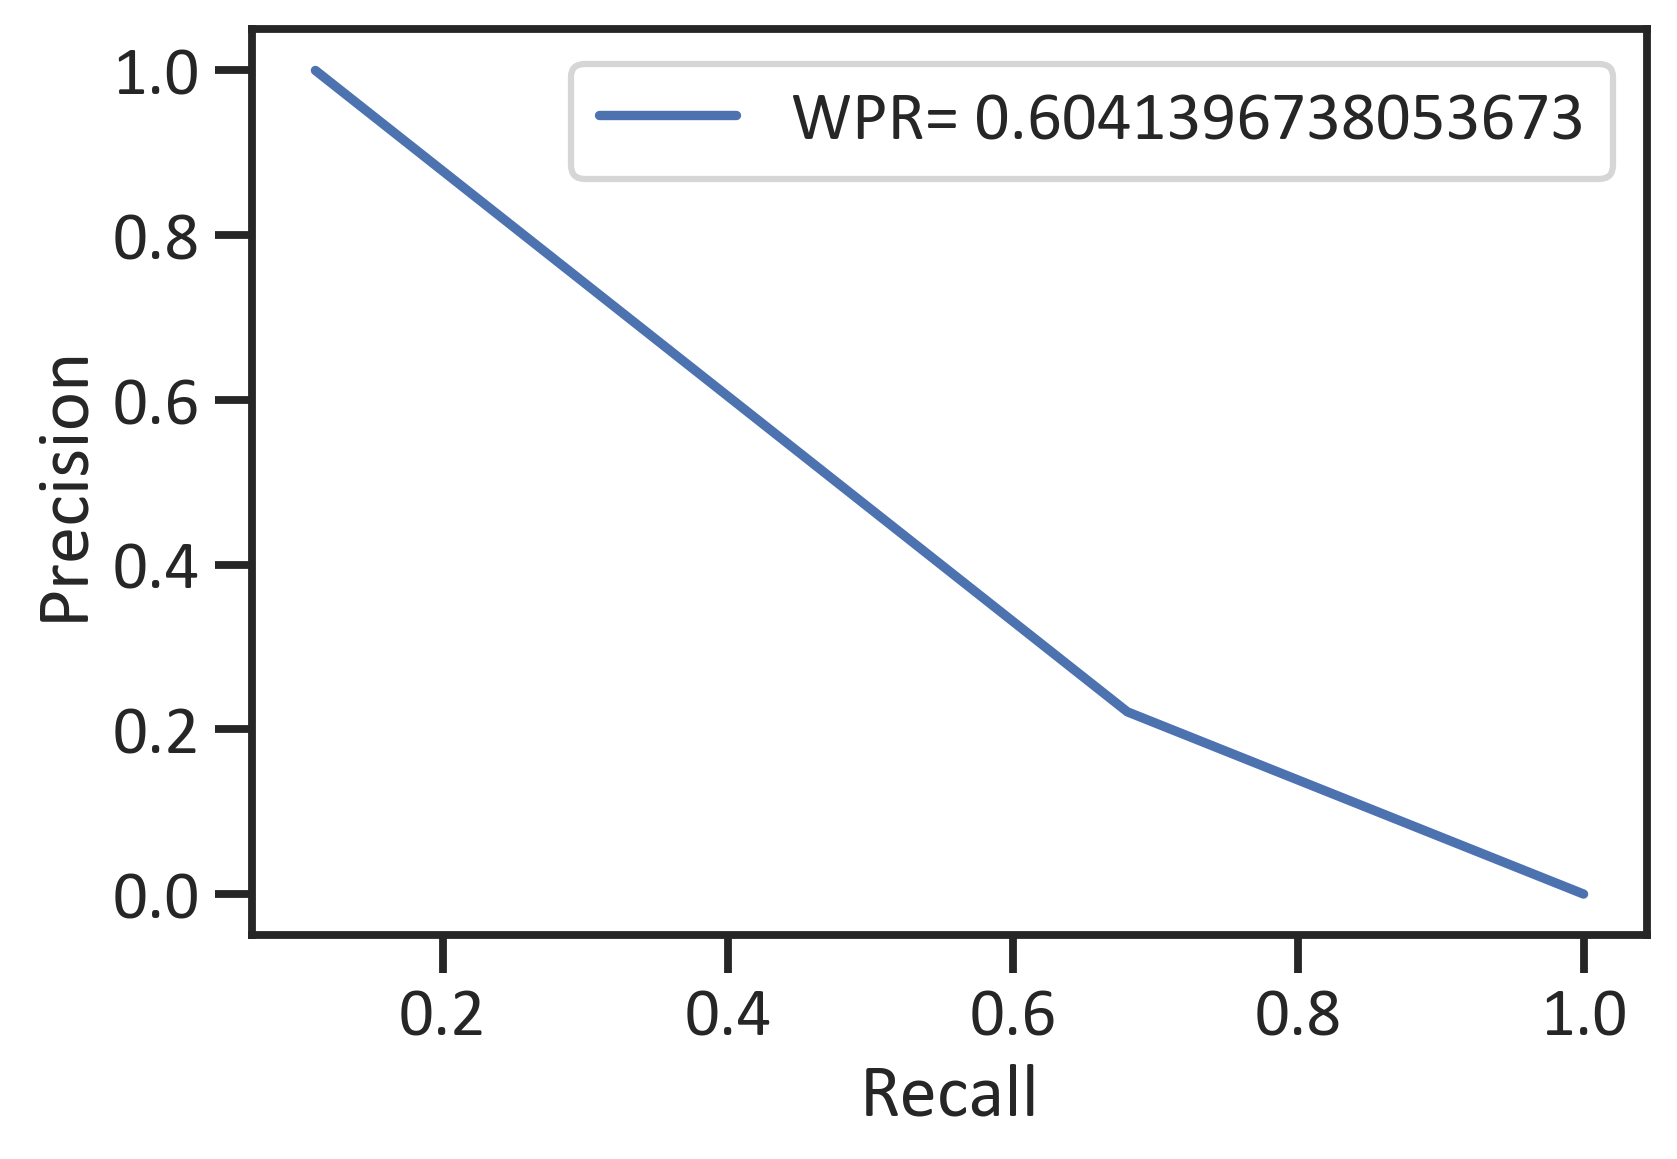

In [17]:
p_sk_logistic_regression_method, r__sk_logistic_regression_method, _ = metrics.precision_recall_curve(y_test, sk_yhat)
weighted_ps_sk_logistic_regression_method = metrics.roc_auc_score(y_test, sk_yhat)
plt.plot(p_sk_logistic_regression_method, r__sk_logistic_regression_method,
         label="WPR= " +str(weighted_ps_sk_logistic_regression_method))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

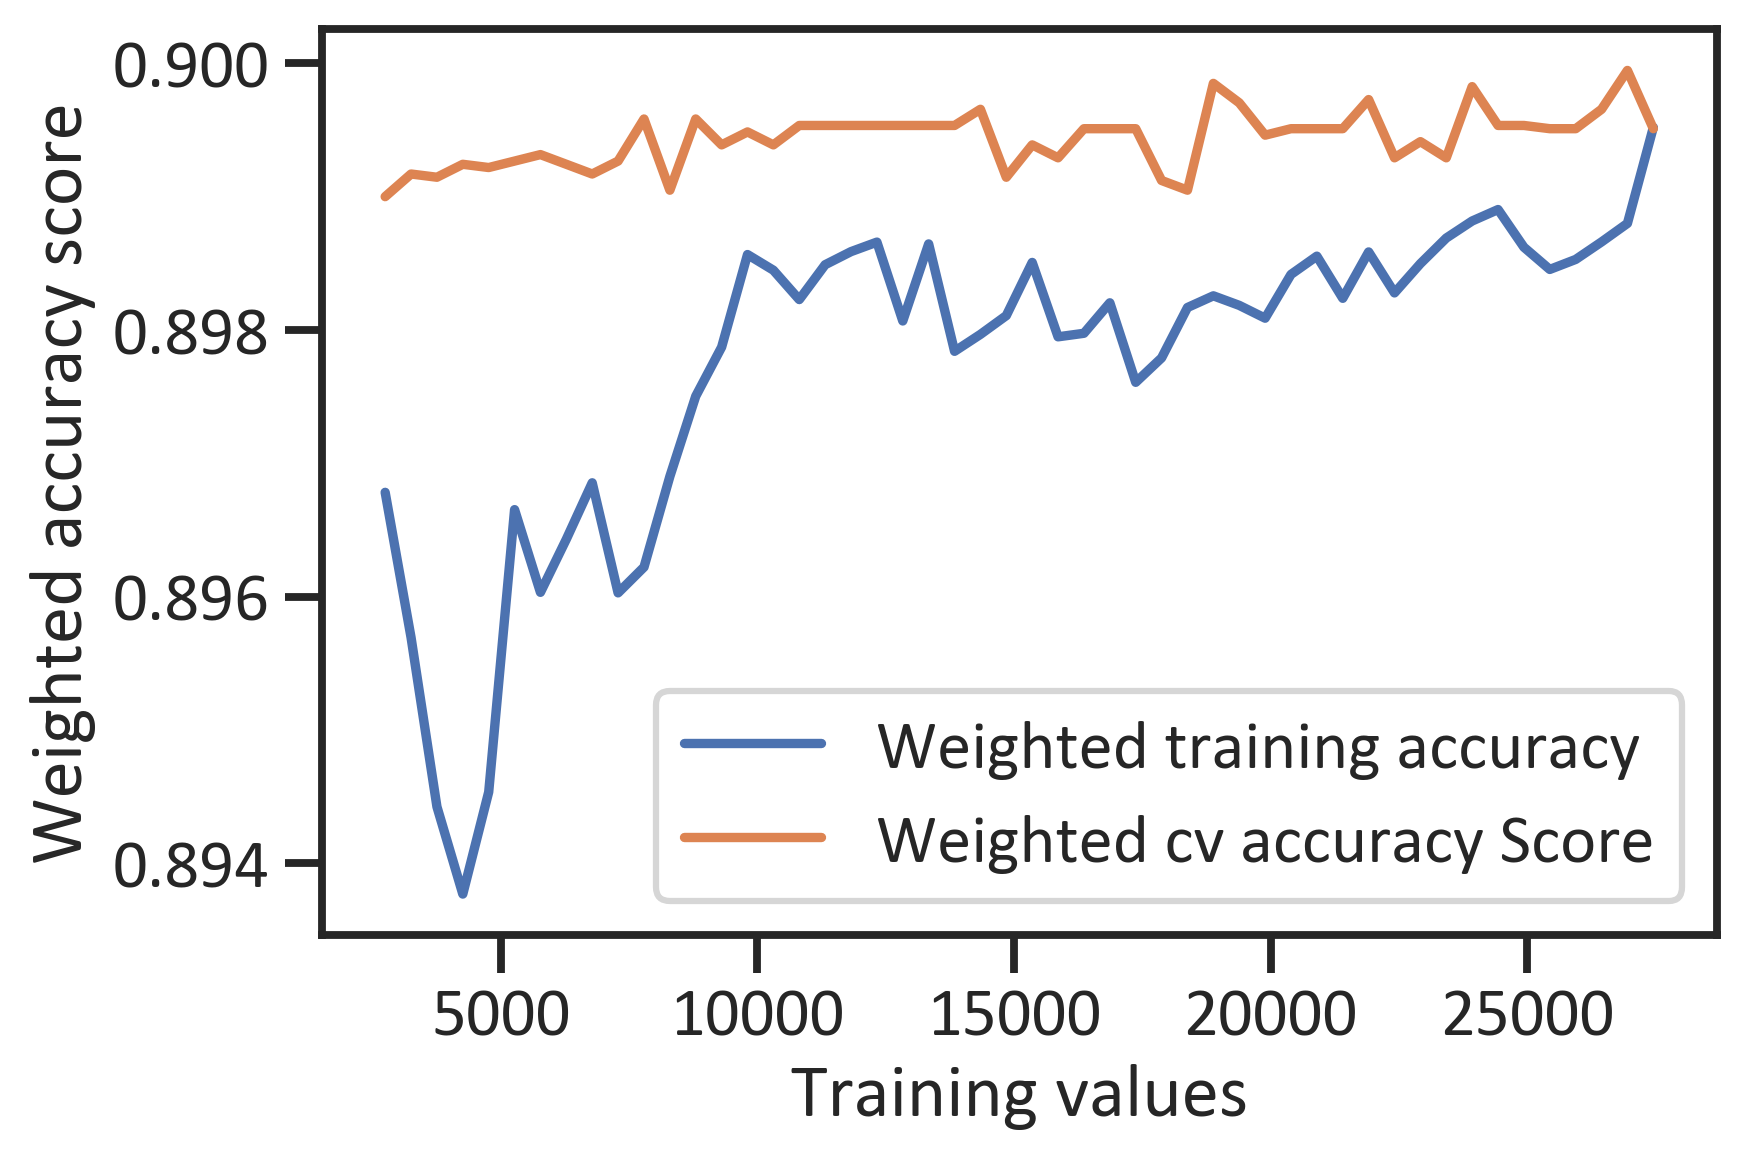

In [18]:
from sklearn.model_selection import learning_curve
train_port_sk_logistic_regression_method, trainscoresk_logistic_regression_method, testscoresk_logistic_regression_method = learning_curve(sk_logistic_regression_method, x, y,
                                                                                                                                        cv=3, n_jobs=-5, train_sizes=np.linspace(0.1,1.0,50))
trainscoresk_logistic_regression_method_mean = np.mean(trainscoresk_logistic_regression_method, axis=1)
testscoresk_logistic_regression_method_mean = np.mean(testscoresk_logistic_regression_method, axis=1)
plt.plot(train_port_sk_logistic_regression_method, trainscoresk_logistic_regression_method_mean, label="Weighted training accuracy")
plt.plot(train_port_sk_logistic_regression_method, testscoresk_logistic_regression_method_mean, label="Weighted cv accuracy Score")
plt.xlabel("Training values")
plt.ylabel("Weighted accuracy score")
plt.legend(loc="best")
plt.show()

# PySpark in Action

In [19]:
import findspark as initiate_pyspark
initiate_pyspark.init("C:\Spark\spark-3.0.0-bin-hadoop2.7")

In [20]:
from pyspark import SparkConf
pyspark_configuration = SparkConf().setAppName("pyspark_logistic_regression_method").setMaster("local")

In [21]:
from pyspark import SparkContext
pyspark_context = SparkContext(conf=pyspark_configuration)

In [22]:
from pyspark.sql import SparkSession
pyspark_session = SparkSession(pyspark_context)

In [23]:
pyspark_initial_data = pyspark_session.createDataFrame(initial_data)

In [24]:
x_list = list(initial_data.iloc[::, 0:17].columns)
y_list = str(initial_data.columns[-1])
from pyspark.ml.feature import VectorAssembler
pyspark_data_columns = x_list
pyspark_vector_assembler = VectorAssembler(inputCols=pyspark_data_columns, outputCol="variables")
pyspark_data = pyspark_vector_assembler.transform(pyspark_initial_data)

In [25]:
(pyspark_training_data, pyspark_test_data) = pyspark_data.randomSplit([.8,.2])

In [26]:
from pyspark.ml.classification import LogisticRegression
pyspark_logistic_regression_method = LogisticRegression(labelCol = y_list, featuresCol = pyspark_data.columns[-1])
pyspark_logistic_regression_method_fitted = pyspark_logistic_regression_method.fit(pyspark_training_data)

In [27]:
pyspark_yhat = pyspark_logistic_regression_method_fitted.transform(pyspark_test_data)

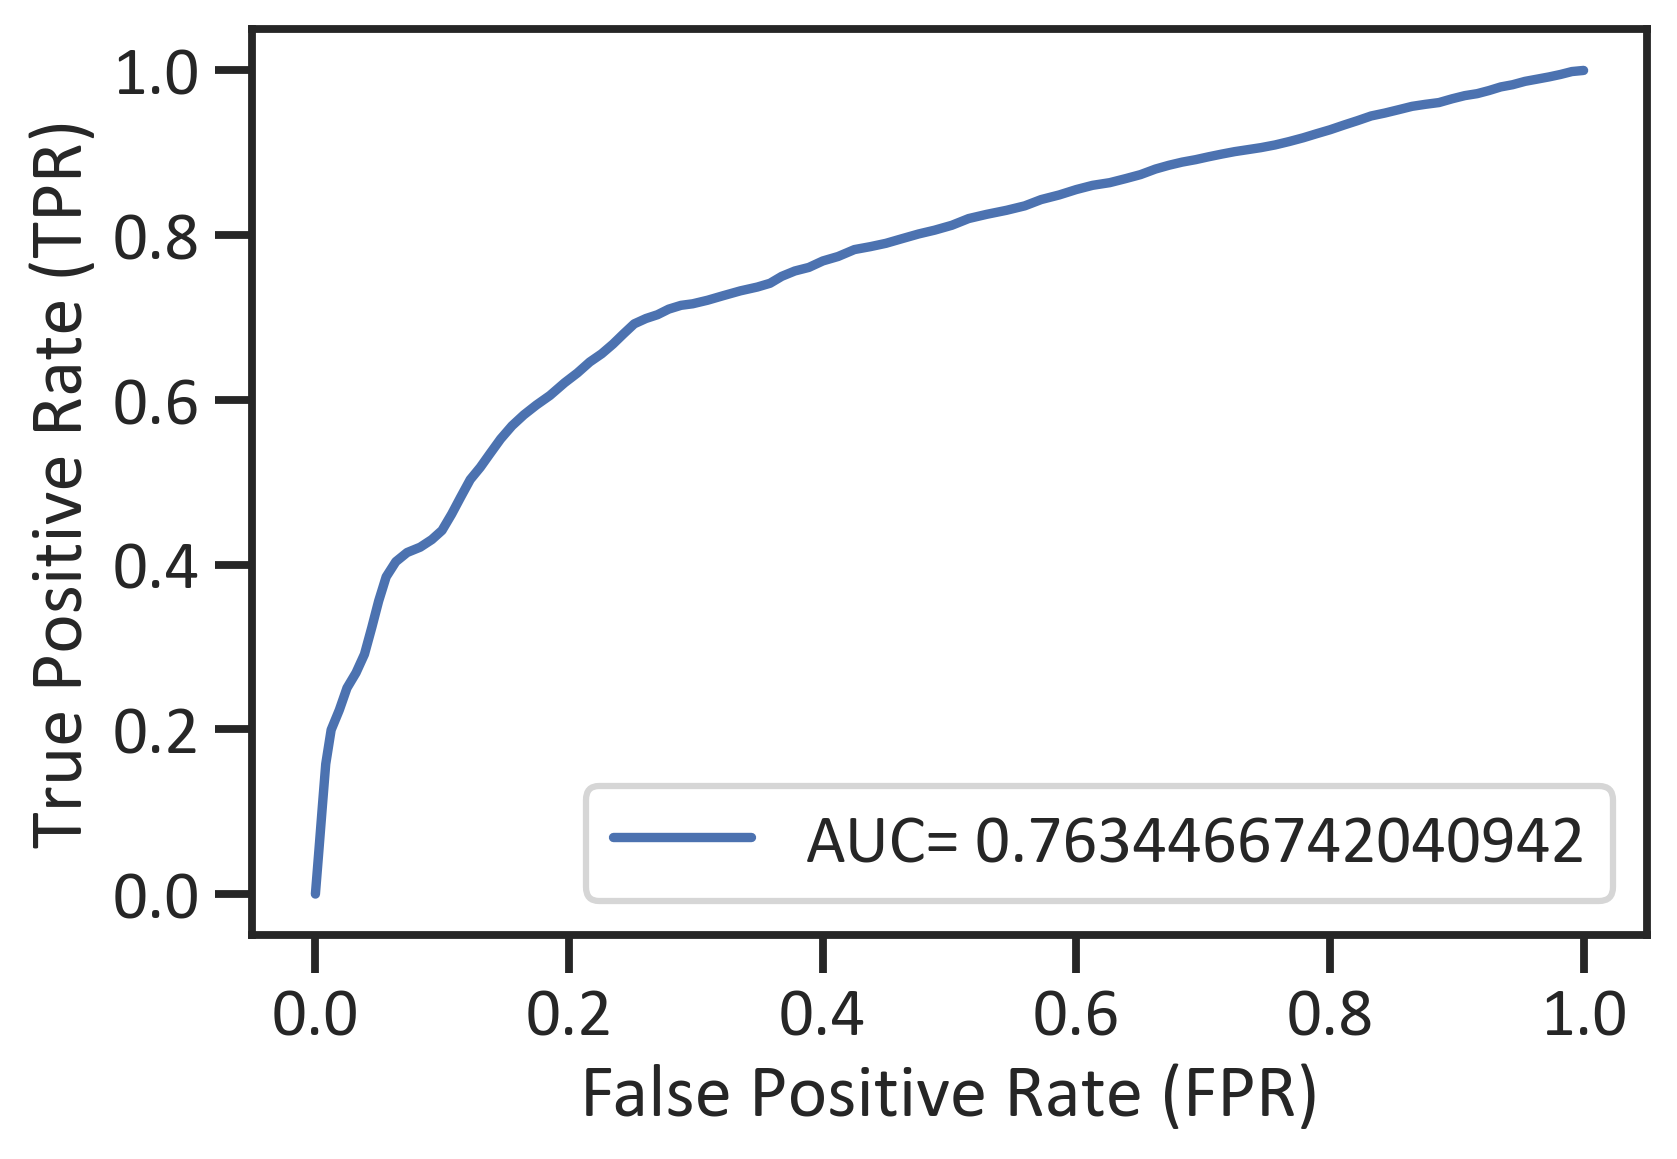

In [28]:
pyspark_logistic_regression_method_assessment = pyspark_logistic_regression_method_fitted.summary
pyspark_logistic_regression_method_roc = pyspark_logistic_regression_method_assessment.roc.toPandas()
pyspark_logistic_regression_method_auroc = pyspark_logistic_regression_method_assessment.areaUnderROC
plt.plot(pyspark_logistic_regression_method_roc["FPR"], pyspark_logistic_regression_method_roc["TPR"],
         label="AUC= "+str(pyspark_logistic_regression_method_auroc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.show()

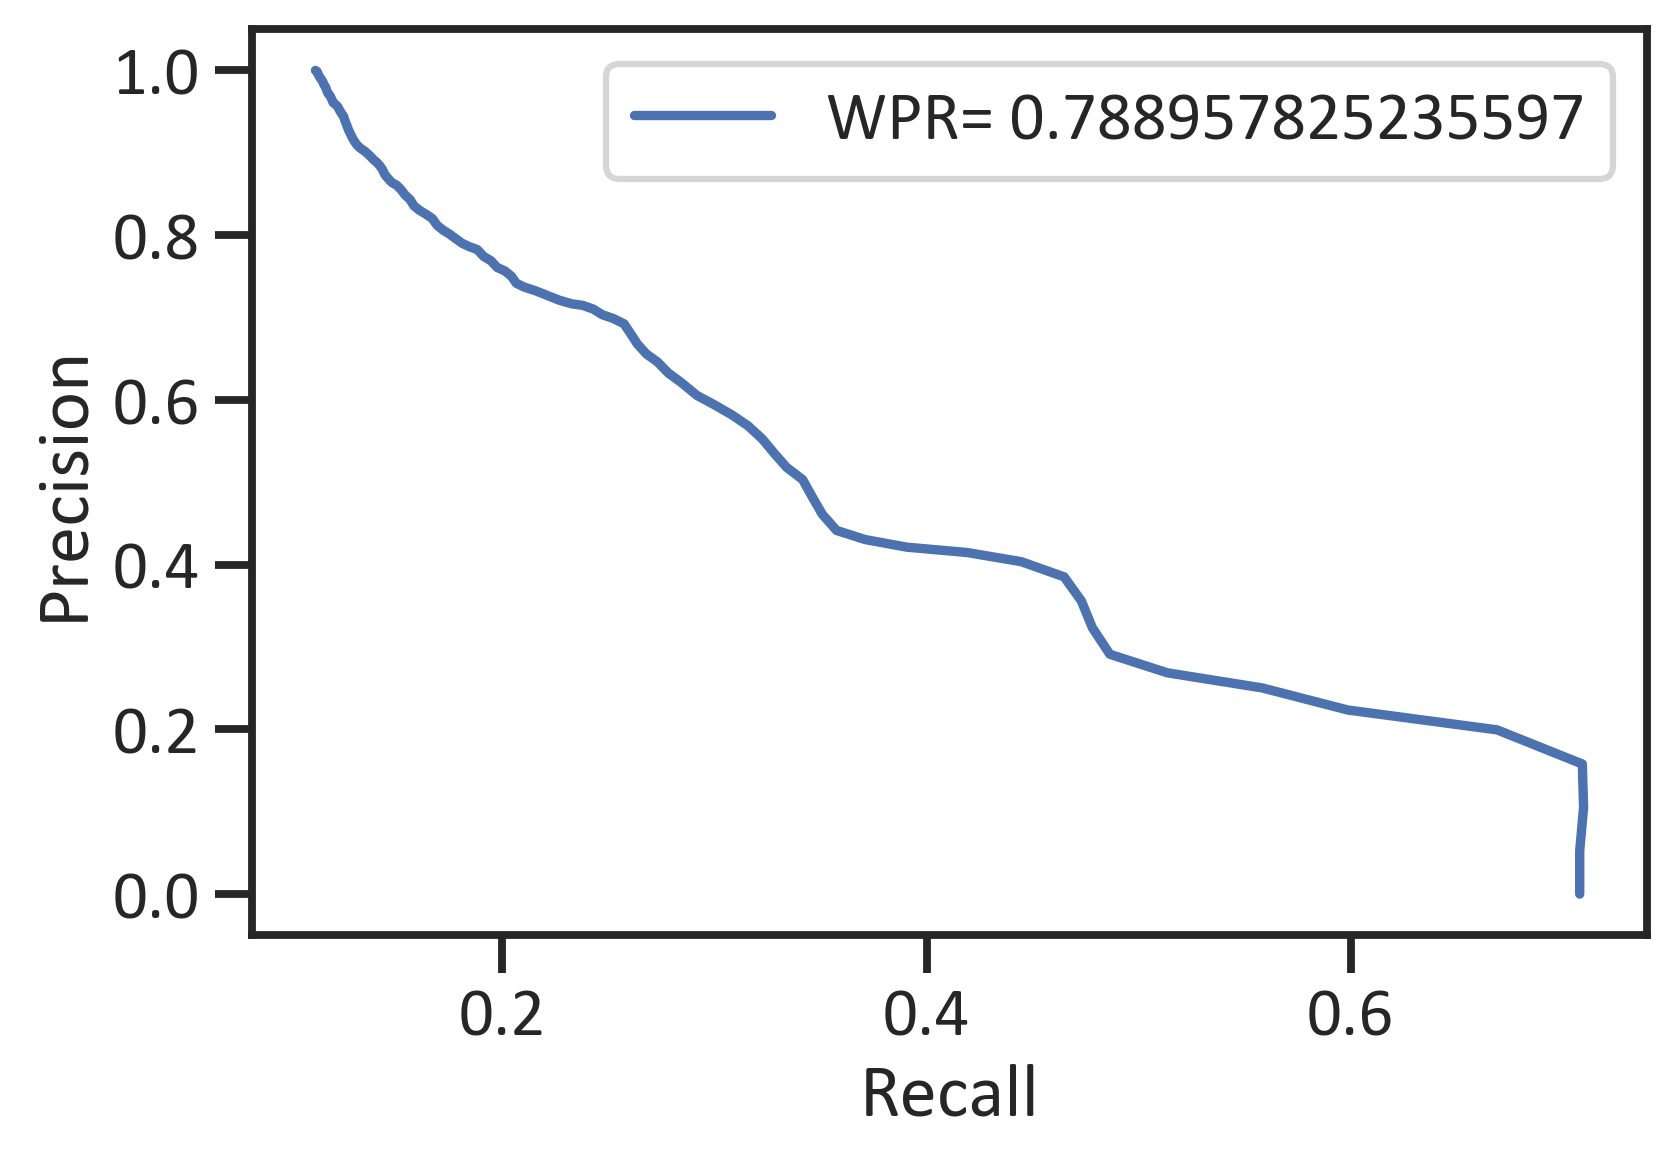

In [29]:
pyspark_logistic_regression_method_assessment_pr = pyspark_logistic_regression_method_assessment.pr.toPandas()
pyspark_logistic_regression_method_assessment_wpr = pyspark_logistic_regression_method_assessment.weightedPrecision
plt.plot(pyspark_logistic_regression_method_assessment_pr["precision"],
         pyspark_logistic_regression_method_assessment_pr["recall"],
         label="WPR= "+str(pyspark_logistic_regression_method_assessment_wpr))
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="best")
plt.show()

## H2O in Action

In [30]:
import h2o as initialize_h2o
initialize_h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,7 hours 6 mins
H2O_cluster_timezone:,Africa/Harare
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"1 year, 1 month and 3 days !!!"
H2O_cluster_name:,H2O_from_python_i5_lenov_unqukj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.975 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [31]:
h2o_data = initialize_h2o.H2OFrame(initial_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
x_list = list(initial_data.iloc[::, 0:17].columns)
y_list = str(initial_data.columns[-1])
y = y_list
x = h2o_data.col_names
x.remove(y_list)

In [33]:
h2o_training_data, h2o_validation_data, h2o_test_data = h2o_data.split_frame(ratios=[.8,.1])

In [34]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
h2o_logistic_regression_method = H2OGeneralizedLinearEstimator(family="binomial")
h2o_logistic_regression_method.train(x = x, y = y, training_frame = h2o_training_data, validation_frame = h2o_validation_data)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [35]:
h2o_yhat = h2o_logistic_regression_method.predict(h2o_test_data)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [36]:
h2o_logistic_regression_method_coefficients = h2o_logistic_regression_method._model_json['output']['coefficients_table'].as_data_frame()

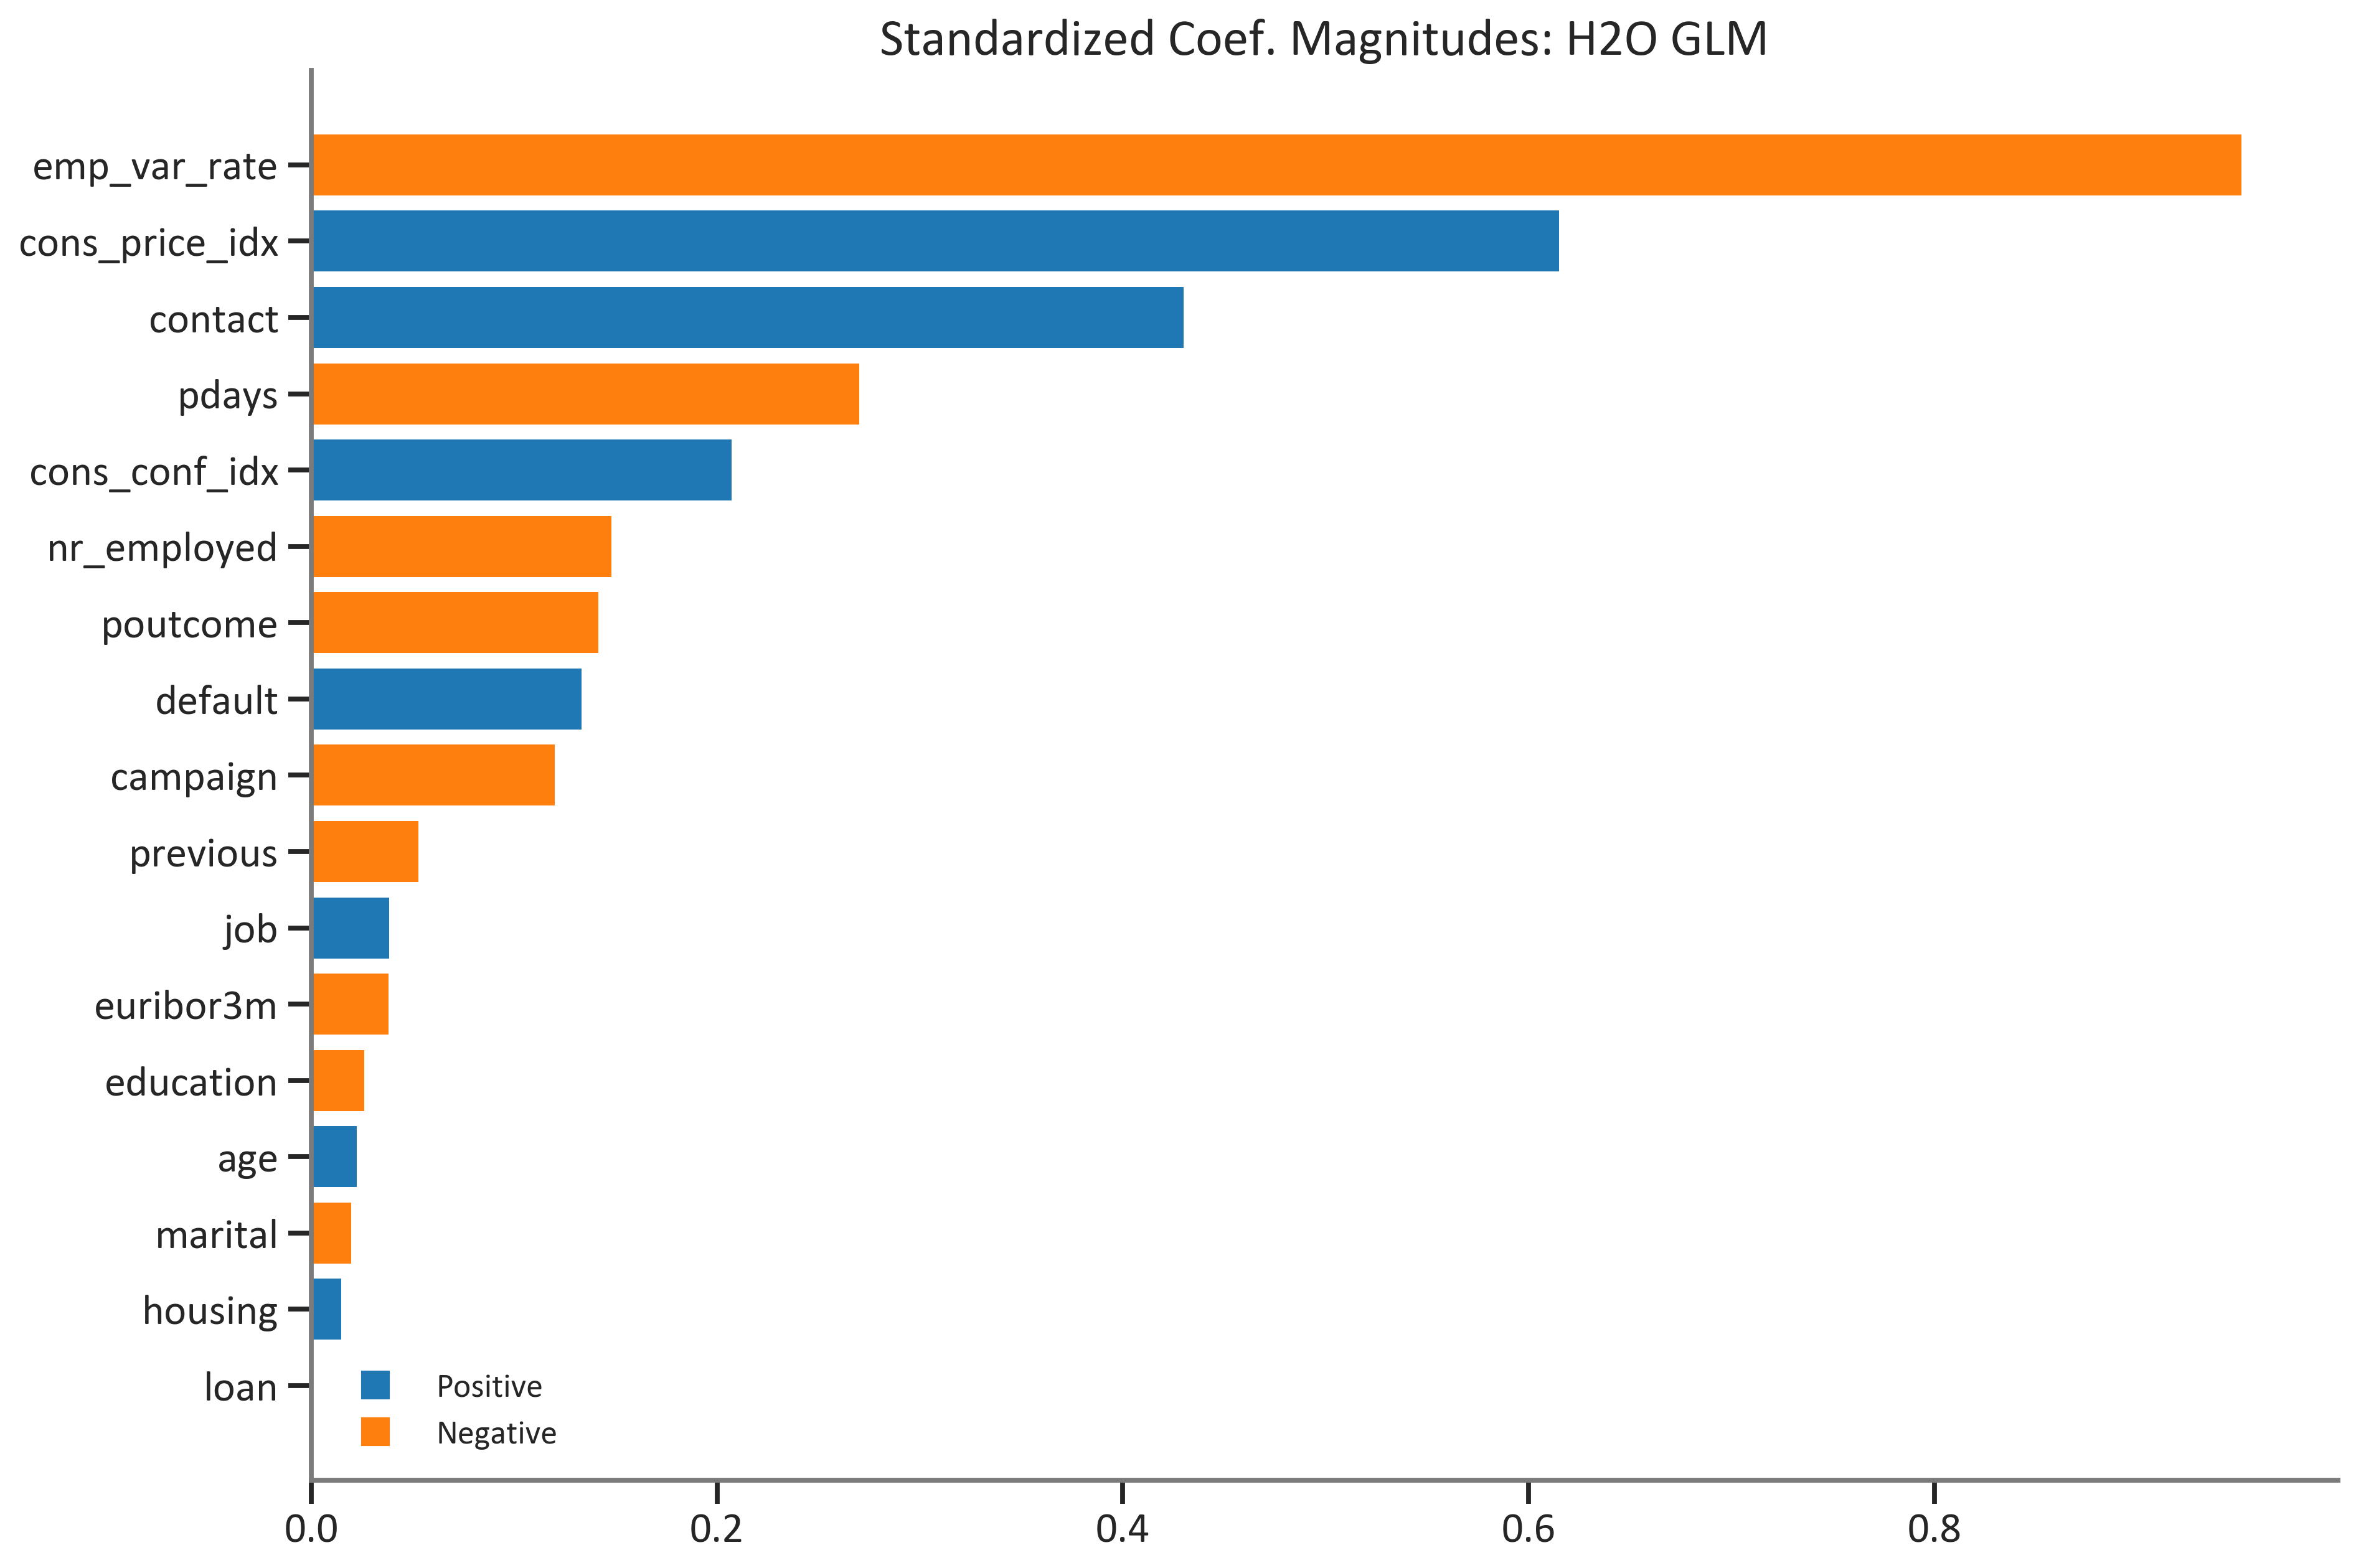

In [37]:
h2o_logistic_regression_method_std_coefficients = h2o_logistic_regression_method.std_coef_plot()
h2o_logistic_regression_method_std_coefficients

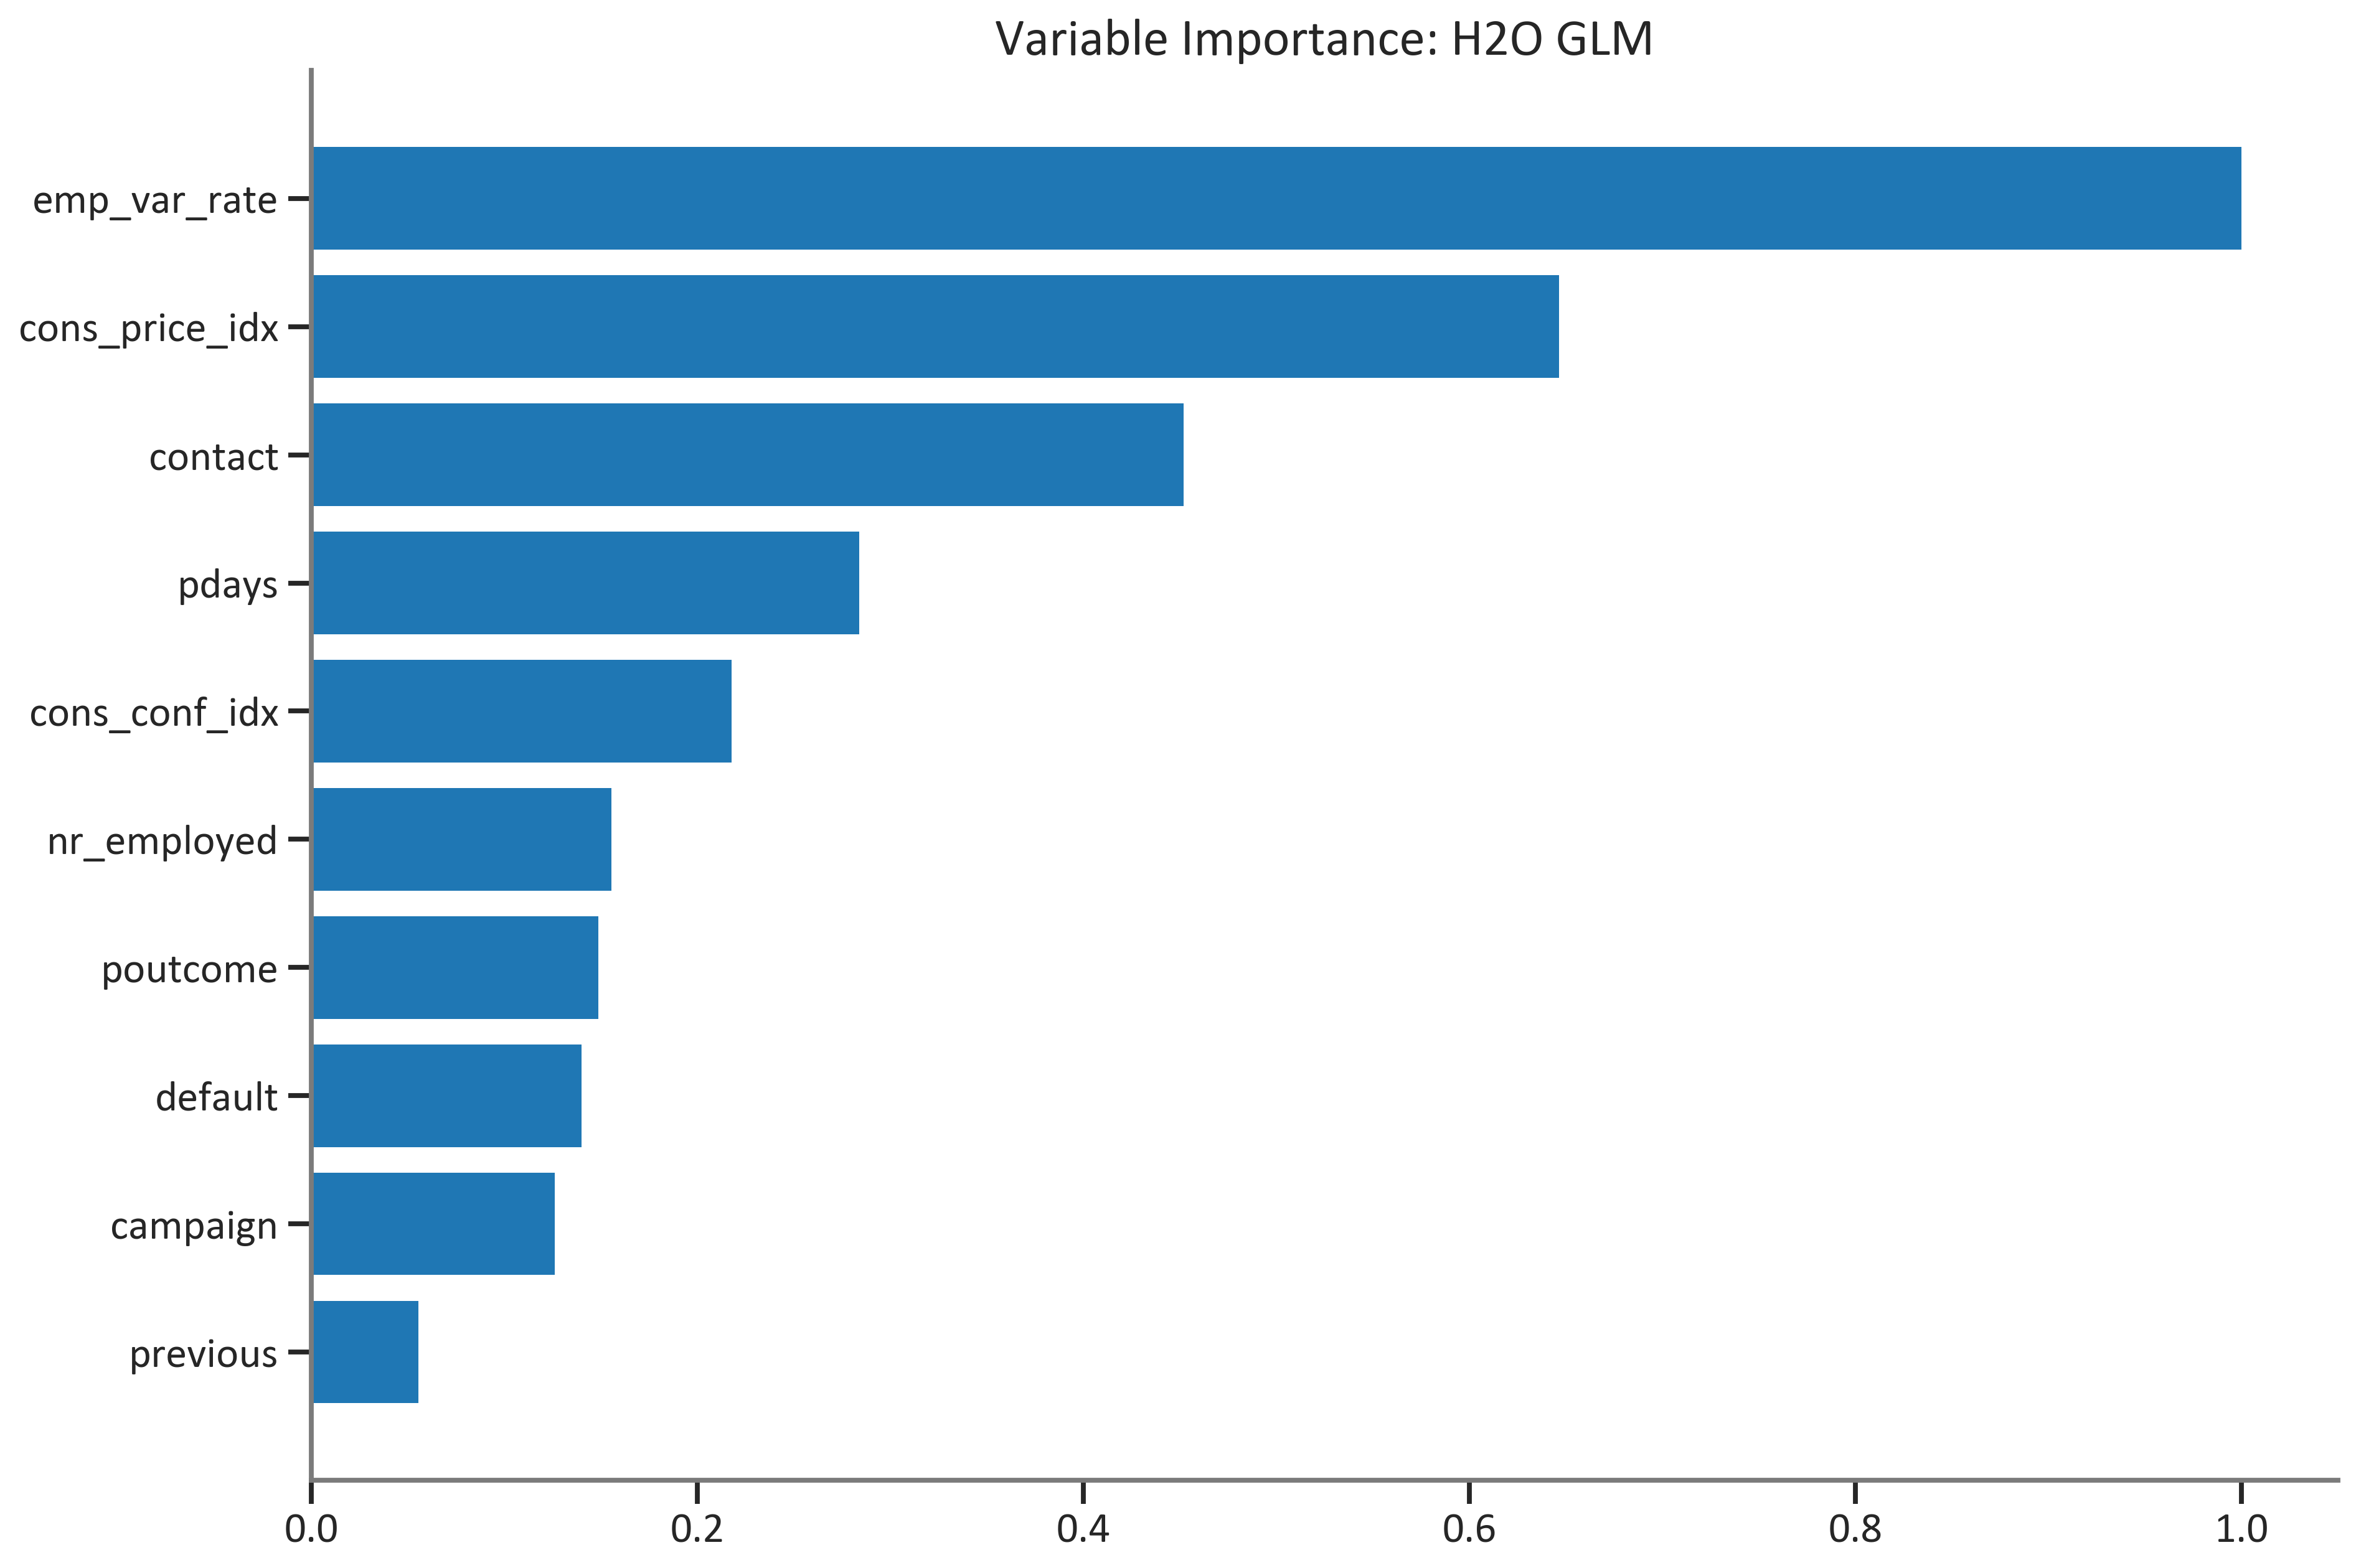

In [38]:
h2o_logistic_regression_method_feature_importance = h2o_logistic_regression_method.varimp_plot()
h2o_logistic_regression_method_feature_importance

In [39]:
h2o_logistic_regression_method_assessment = h2o_logistic_regression_method.model_performance()
h2o_logistic_regression_method_assessment


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07976293697544043
RMSE: 0.2824233293753199
LogLoss: 0.2821019662063979
Null degrees of freedom: 32940
Residual degrees of freedom: 32924
Null deviance: 23229.729813745005
Residual deviance: 18585.44173760991
AIC: 18619.44173760991
AUC: 0.7838213412949077
AUCPR: 0.44307053729293877
Gini: 0.5676426825898153

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18773055182157444: 


,,0,1,Error,Rate
0,0,26931.0,2290.0,0.0784,(2290.0/29221.0)
1,1,1883.0,1837.0,0.5062,(1883.0/3720.0)
2,Total,28814.0,4127.0,0.1267,(4173.0/32941.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.187731,0.468204,203.0
1,max f2,0.117150,0.532833,264.0
2,max f0point5,0.385428,0.497492,123.0
3,max accuracy,0.511326,0.900124,80.0
4,max precision,0.826754,1.000000,0.0
5,max recall,0.011059,1.000000,398.0
6,max specificity,0.826754,1.000000,0.0
7,max absolute_mcc,0.190703,0.397288,201.0
8,max min_per_class_accuracy,0.080803,0.715591,294.0
9,max mean_per_class_accuracy,0.117150,0.732266,264.0



Gains/Lift Table: Avg response rate: 11,29 %, avg score: 11,29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010018,0.760254,7.084086,7.084086,0.800000,0.784805,0.800000,0.784805,0.070968,0.070968,608.408602,608.408602,0.068709
1,2,0.020005,0.674260,6.378907,6.732032,0.720365,0.725591,0.760243,0.755243,0.063710,0.134677,537.890725,573.203167,0.129270
2,3,0.030023,0.535021,5.500900,6.321240,0.621212,0.600602,0.713852,0.703644,0.055108,0.189785,450.090013,532.123955,0.180100
3,4,0.040011,0.482974,4.360266,5.831740,0.492401,0.503342,0.658574,0.653644,0.043548,0.233333,336.026571,483.174001,0.217933
4,5,0.050029,0.448884,3.864047,5.437724,0.436364,0.466318,0.614078,0.616134,0.038710,0.272043,286.404692,443.772380,0.250278
5,6,0.100027,0.274264,3.156010,4.297213,0.356406,0.349923,0.485281,0.483069,0.157796,0.429839,215.600979,329.721303,0.371798
6,7,0.150026,0.171936,2.155979,3.583613,0.243473,0.204587,0.404694,0.390260,0.107796,0.537634,115.597943,258.361292,0.436953
7,8,0.200024,0.153680,1.241973,2.998292,0.140255,0.161598,0.338595,0.333103,0.062097,0.599731,24.197319,199.829183,0.450592
8,9,0.300021,0.088439,0.994654,2.330480,0.112325,0.120019,0.263179,0.262083,0.099462,0.699194,-0.534615,133.048008,0.449989
9,10,0.400018,0.064027,0.612922,1.901123,0.069217,0.075442,0.214692,0.215426,0.061290,0.760484,-38.707817,90.112311,0.406355


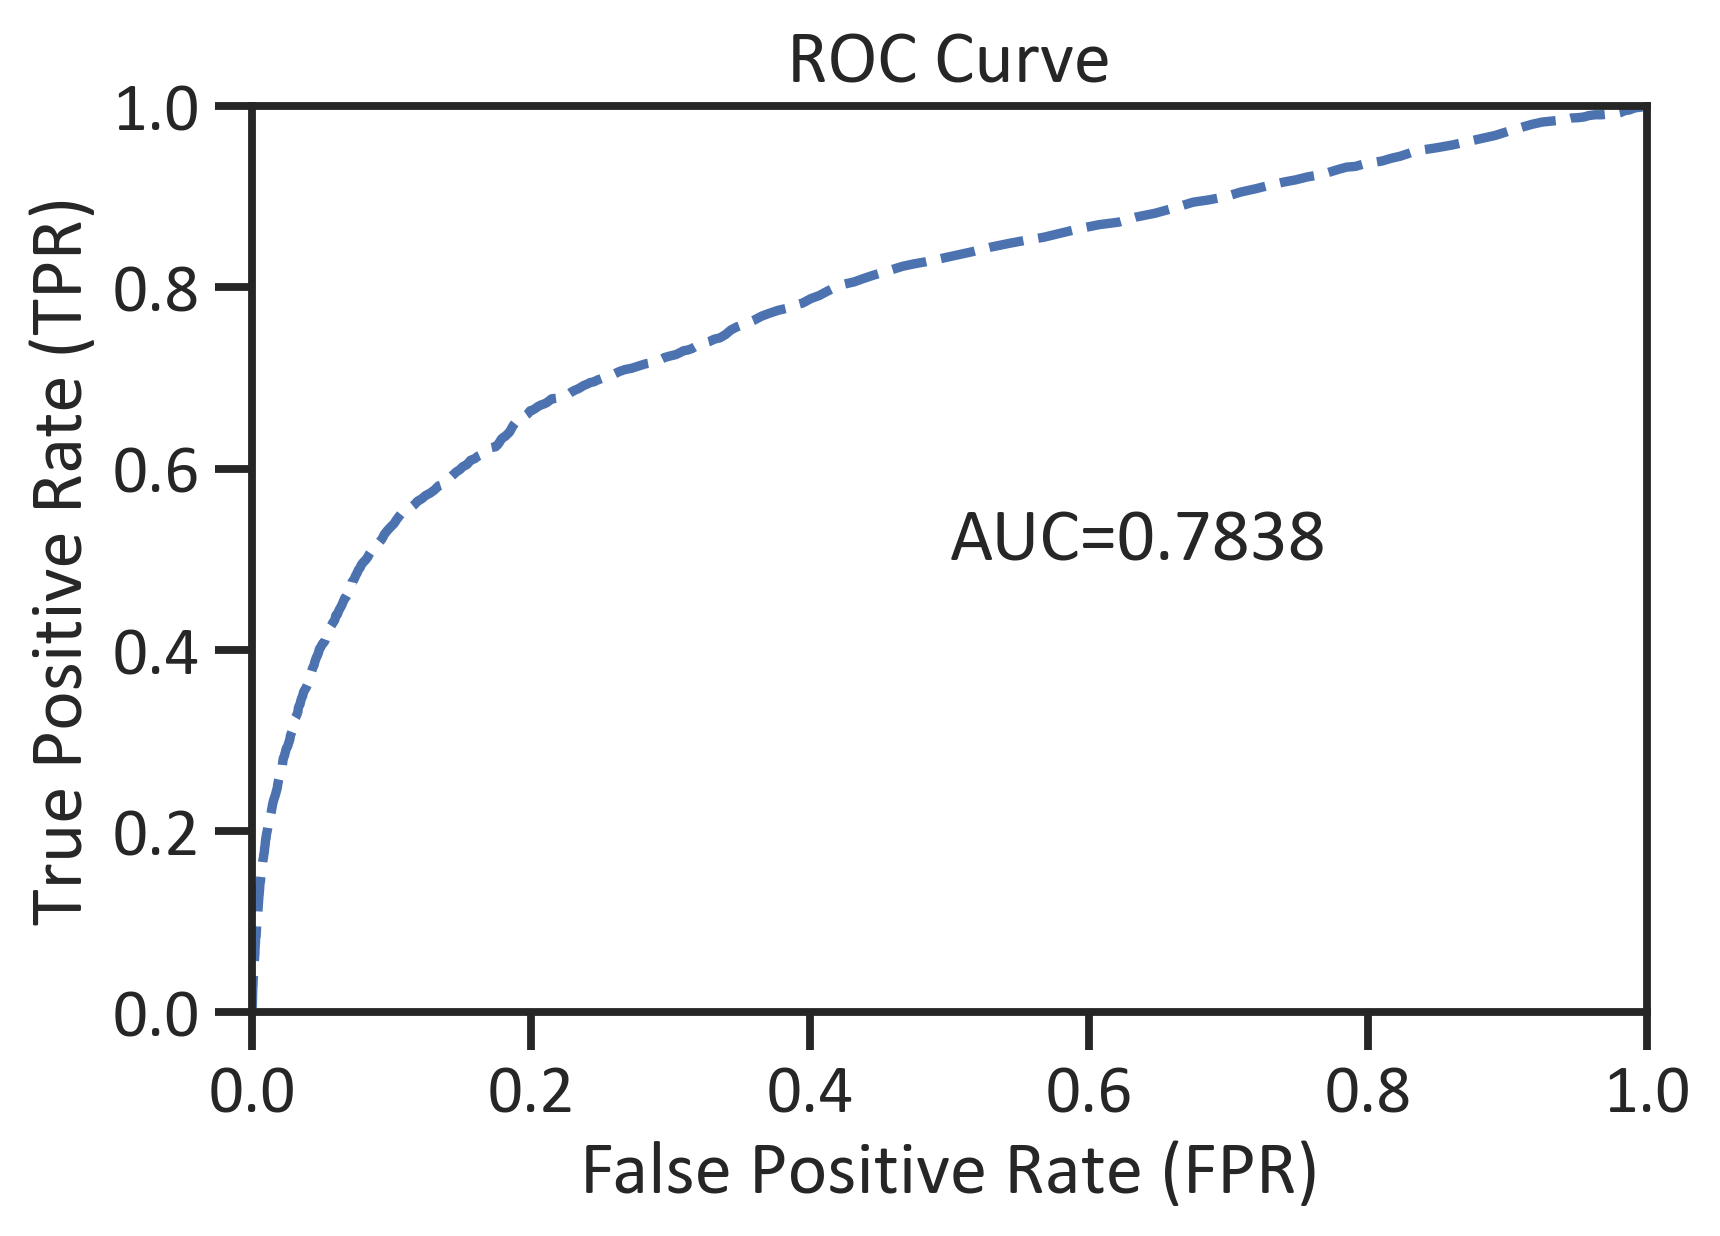

In [40]:
h2o_logistic_regression_method_assessment.plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model GLM_model_python_1629846190747_2 on column 'age'.


,age,mean_response,stddev_response,std_error_mean_response
0,17.000000,0.108724,0.138466,0.000682
1,21.263158,0.109436,0.138939,0.000685
2,25.526316,0.110151,0.139413,0.000687
3,29.789474,0.110870,0.139885,0.000689
4,34.052632,0.111593,0.140358,0.000692
5,38.315789,0.112320,0.140830,0.000694
6,42.578947,0.113051,0.141302,0.000696
7,46.842105,0.113786,0.141773,0.000699
8,51.105263,0.114525,0.142244,0.000701
9,55.368421,0.115267,0.142714,0.000703



PartialDependence: Partial Dependence Plot of model GLM_model_python_1629846190747_2 on column 'y'.


,y,mean_response,stddev_response,std_error_mean_response
0,0.0,0.112634,0.141294,0.000696
1,1.0,0.112634,0.141294,0.000696


[, ]

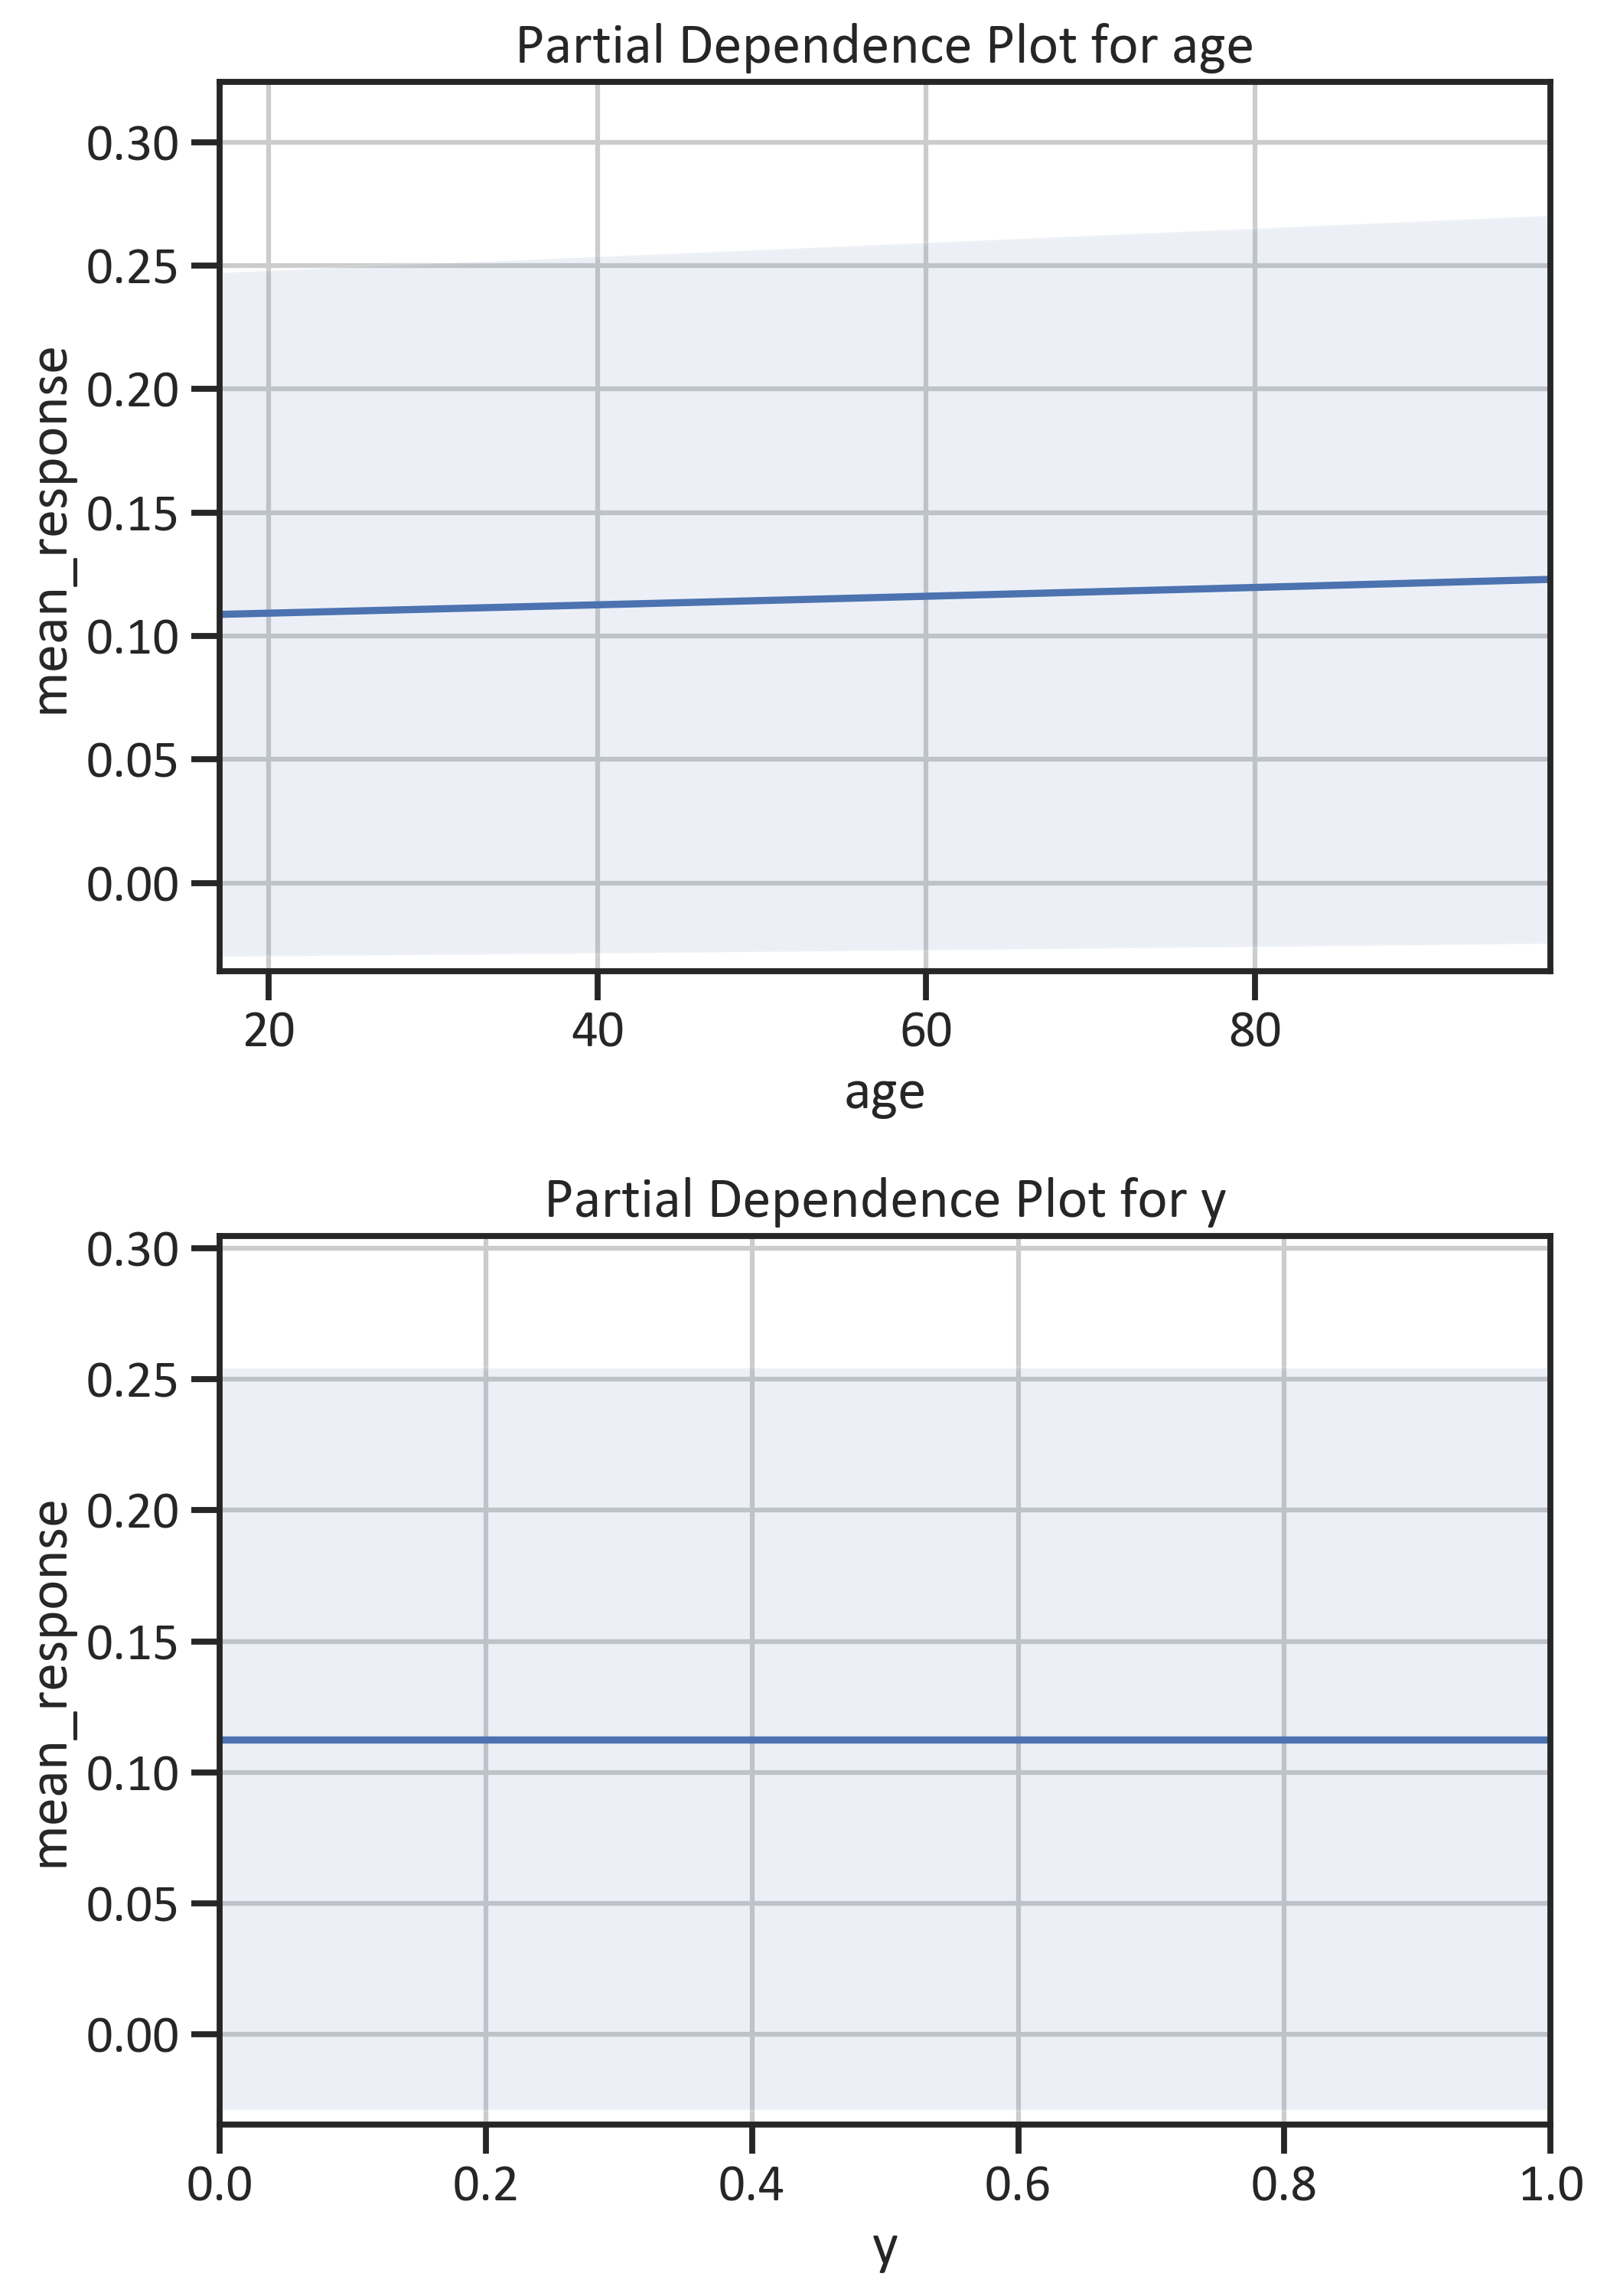

In [41]:
h2o_logistic_regression_method_dependency_plot = h2o_logistic_regression_method.partial_plot(data = h2o_data, cols = list(initial_data.columns[[0, 17]]), server=False, plot = True)
h2o_logistic_regression_method_dependency_plot

In [42]:
h2o_logistic_regression_method_scoring_history = h2o_logistic_regression_method.scoring_history()
h2o_logistic_regression_method_scoring_history

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2021-08-25 08:10:46,0.000 sec,0,11614.864907,0.352596
1,,2021-08-25 08:10:47,0.250 sec,1,10189.545572,0.310018
2,,2021-08-25 08:10:47,0.361 sec,2,9463.598236,0.287837
3,,2021-08-25 08:10:47,0.427 sec,3,9295.511141,0.282628
4,,2021-08-25 08:10:47,0.478 sec,4,9292.720869,0.282561
